In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

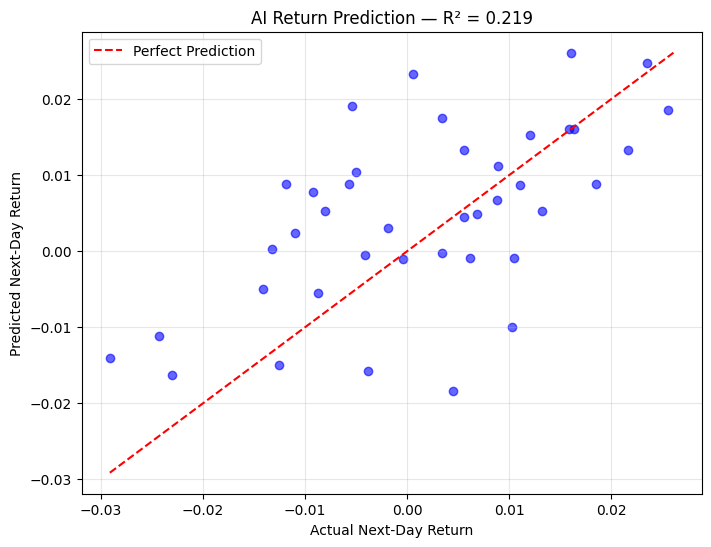

Feature Weights:
Volume         0.131994
Sentiment      0.203880
Past_Return    0.664126
dtype: float64


In [8]:
# --- Simulate stock data ---
np.random.seed(42)
n_days = 200

volume = np.random.randint(1000, 10000, n_days)
sentiment = np.random.uniform(0, 1, n_days)
past_return = np.random.normal(0.001, 0.02, n_days)  # yesterday's return

# True relationship (hidden from the model)
true_next_return = 0.0005*sentiment + 0.0000005*volume + 0.5*past_return + np.random.normal(0, 0.01, n_days)

# Combine into dataframe
df = pd.DataFrame({
    "Volume": volume,
    "Sentiment": sentiment,
    "Past_Return": past_return,
    "Next_Return": true_next_return
})

# --- Split data ---
X = df[["Volume", "Sentiment", "Past_Return"]]
y = df["Next_Return"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train model ---
# model = LinearRegression()
model = GradientBoostingRegressor(
    n_estimators=100,       # number of boosting rounds (trees)
    learning_rate=0.1,      # how much each tree contributes
    max_depth=3,            # complexity of each tree
    random_state=42
)

model.fit(X_train, y_train)

# --- Predictions ---
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# --- Feature importances ---
# importance = pd.Series(model.coef_, index=X.columns)
importance = pd.Series(model.feature_importances_, index=X.columns)


# --- Plot actual vs predicted ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
min_val, max_val = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Next-Day Return")
plt.ylabel("Predicted Next-Day Return")
plt.title(f"AI Return Prediction — R² = {r2:.3f}")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- Print summary ---
print("Feature Weights:")
print(importance)
